# Example for using the Pvlib model

The `Pvlib` model can be used to determine the feed-in of a photovoltaic module using the pvlib.
The [pvlib](https://github.com/pvlib/pvlib-python) is a python library for simulating the performance of photovoltaic energy systems. For more information check out the [documentation of the pvlib](https://pvlib-python.readthedocs.io/en/stable/).

The following example shows you how to use the `Pvlib` model.

* [Set up Photovoltaic object](#photovoltaic_object)
* [Get weather data](#weather_data)
* [Calculate feed-in](#feedin)

## Set up Photovoltaic object <a class="anchor" id="photovoltaic_object"></a>

To calculate the feed-in using the `Pvlib` model you have to set up a `Photovoltaic` object. You can import it as follows:

In [1]:
from feedinlib import Photovoltaic

To set up a Photovoltaic system you have to provide all PV system parameters required by the `PVlib` model. The required parameters can be looked up in the [model's documentation](https://feedinlib.readthedocs.io/en/features-design-skeleton/temp/feedinlib.models.Pvlib.html#feedinlib.models.Pvlib.power_plant_requires).
For the `Pvlib` model these are the **azimuth** and **tilt** of the module as well as the **albedo or surface type**. Furthermore, the **name of the module and inverter** are needed to obtain technical parameters from the provided module and inverter databases. For an overview of the provided modules and inverters you can use the function `get_power_plant_data()`.

In [2]:
from feedinlib import get_power_plant_data

In [3]:
# get modules
module_df = get_power_plant_data(dataset='sandiamod')
# print the first four modules
module_df.iloc[:, 1:5]

,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__
Vintage,2008,2009,2007 (E),2007 (E)
Area,1.646,1.646,1.28,1.28
Material,mc-Si,mc-Si,c-Si,c-Si
Cells_in_Series,60,60,72,72
Parallel_Strings,1,1,1,1
Isco,8.34,8.49,5.1,5.2
Voco,35.31,35.92,43.5,43.6
Impo,7.49,7.74,4.55,4.65
Vmpo,27.61,27.92,35.6,35.8
Aisc,0.00077,0.00082,0.0003,0.0003


In [4]:
# get inverter data
inverter_df = get_power_plant_data(dataset='cecinverter')
# print the first four inverters
inverter_df.iloc[:, 1:5]

,ABB__MICRO_0_25_I_OUTD_US_208__208V__208V__CEC_2018_,ABB__MICRO_0_25_I_OUTD_US_240_240V__CEC_2014_,ABB__MICRO_0_25_I_OUTD_US_240__240V__240V__CEC_2018_,ABB__MICRO_0_3_I_OUTD_US_208_208V__CEC_2014_
Vac,208.000000,240.000000,240.000000,208.000000
Paco,250.000000,250.000000,250.000000,300.000000
Pdco,259.589000,259.552697,259.492000,311.714554
Vdco,40.000000,39.982246,40.000000,40.227111
Pso,2.089610,1.931194,2.240410,1.971053
C0,-0.000041,-0.000027,-0.000039,-0.000036
C1,-0.000091,-0.000158,-0.000132,-0.000256
C2,0.000494,0.001480,0.002418,-0.000833
C3,-0.013171,-0.034600,-0.014926,-0.039100
Pnt,0.020000,0.050000,0.050000,0.020000


Now you can set up a PV system to calculate feed-in for, using for example the first module and converter in the databases:

In [5]:
system_data = {
    'module_name': 'Advent_Solar_Ventura_210___2008_',  # module name as in database
    'inverter_name': 'ABB__MICRO_0_25_I_OUTD_US_208__208V__208V__CEC_2018_',  # inverter name as in database
    'azimuth': 180,
    'tilt': 30,
    'albedo': 0.2}
pv_system = Photovoltaic(**system_data)

**Optional power plant parameters**

Besides the required PV system parameters you can provide optional parameters such as the number of modules per string, etc. Optional PV system parameters are specific to the used model and how to find out about the possible optional parameters is documented in the model's `feedin` method under `power_plant_parameters`. In case of the `Pvlib` model see [here](https://feedinlib.readthedocs.io/en/features-design-skeleton/temp/feedinlib.models.Pvlib.html#feedinlib.models.Pvlib.feedin). 

In [6]:
system_data['modules_per_string'] = 2
pv_system_with_optional_parameters = Photovoltaic(**system_data)

## Get weather data <a class="anchor" id="weather_data"></a>

Besides setting up your PV system you have to provide weather data the feed-in is calculated with.
This example uses open_FRED weather data. For more information on the data and download see the [load_open_fred_weather_data Notebook](load_open_fred_weather_data.ipynb).

In [7]:
from feedinlib.db import Weather
from feedinlib.db import defaultdb
from shapely.geometry import Point

In [8]:
# specify latitude and longitude of PV system location
lat = 52.4
lon = 13.5
location = Point(lon, lat)

In [9]:
# download weather data for June 2017
open_FRED_weather_data = Weather(
    start='2017-06-01', stop='2017-07-01', 
    locations=[location],
    variables="pvlib",
    **defaultdb())

In [10]:
# get weather data in pvlib format
weather_df = open_FRED_weather_data.df(location=location, lib="pvlib")

/home/birgit/virtualenvs/feedinlib/lib/python3.6/site-packages/pandas/core/sorting.py:257: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  items = np.asanyarray(items)


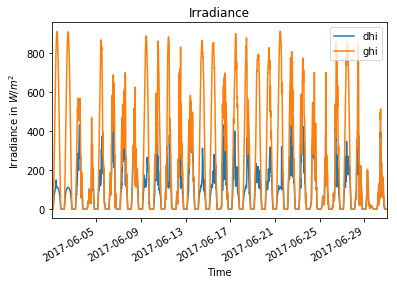

In [11]:
# plot irradiance
import matplotlib.pyplot as plt
%matplotlib inline
weather_df.loc[:, ['dhi', 'ghi']].plot(title='Irradiance')
plt.xlabel('Time')
plt.ylabel('Irradiance in $W/m^2$');

## Calculate feed-in <a class="anchor" id="feedin"></a>

The feed-in can be calculated by calling the `Photovoltaic`'s `feedin` method with the weather data. For the `Pvlib` model you also have to provide the location of the PV system.

In [12]:
feedin = pv_system.feedin(
    weather=weather_df,
    location=(lat, lon))

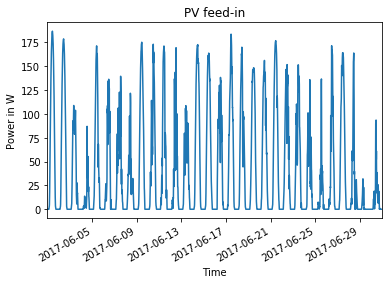

In [13]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin.plot(title='PV feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

**Scaled feed-in**

The PV feed-in can also be automatically scaled by the PV system's area or peak power. The following example shows how to scale feed-in by area.

In [14]:
feedin_scaled = pv_system.feedin(
    weather=weather_df,
    location=(lat, lon),
    scaling='area')

To scale by the peak power use `scaling=peak_power`.

The PV system area and peak power can be retrieved as follows:

In [15]:
pv_system.area

1.646

In [16]:
pv_system.peak_power

206.7989

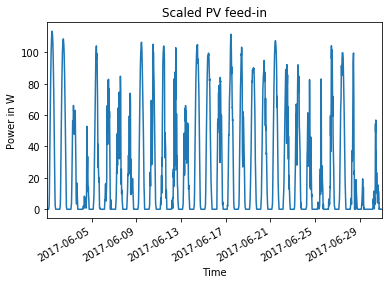

In [17]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_scaled.plot(title='Scaled PV feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

**Feed-in for PV system with optional parameters**

In the following example the feed-in is calculated for the PV system with optional system parameters (with 2 modules per string, instead of 1, which is the default). It was chosen to demonstrate the importantance of choosing a suitable converter.

In [18]:
feedin_ac = pv_system_with_optional_parameters.feedin(
    weather=weather_df,
    location=(lat, lon))

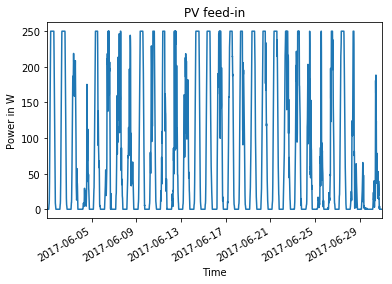

In [19]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_ac.plot(title='PV feed-in')
plt.xlabel('Time')
plt.ylabel('Power in W');

As the above plot shows the feed-in is cut off at 250 W. That is because it is limited by the inverter. So while the area is as expected two times greater as for the PV system without optional parameters, the peak power is only around 1.2 times higher.

In [20]:
pv_system_with_optional_parameters.peak_power / pv_system.peak_power

1.208903915833208

In [21]:
pv_system_with_optional_parameters.area / pv_system.area

2.0

If you are only interested in the modules power output without the inverter losses you can have the `Pvlib` model return the DC feed-in. This is done as follows: 

In [22]:
feedin_dc = pv_system_with_optional_parameters.feedin(
    weather=weather_df,
    location=(lat, lon),
    mode='dc')

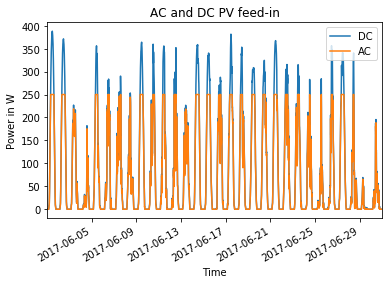

In [23]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_dc.plot(label='DC', title='AC and DC PV feed-in', legend=True)
feedin_ac.plot(label='AC', legend=True)
plt.xlabel('Time')
plt.ylabel('Power in W');

**Feed-in with optional model parameters**

In order to change the default calculation configurations of the `Pvlib` model to e.g. choose a different model to calculate losses or the solar position you can pass further parameters to the `feedin` method. An overview of which further parameters may be provided is documented under the [feedin method](https://feedinlib.readthedocs.io/en/features-design-skeleton/temp/feedinlib.models.Pvlib.html#feedinlib.models.Pvlib.feedin)'s kwargs.

In [24]:
feedin_no_loss = pv_system.feedin(
    weather=weather_df,
    location=(lat, lon),
    aoi_model='no_loss')

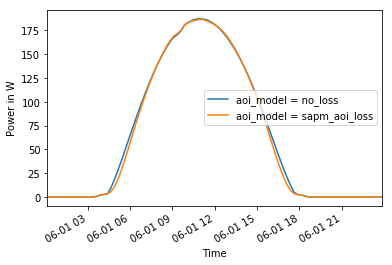

In [25]:
# plot calculated feed-in
import matplotlib.pyplot as plt
%matplotlib inline
feedin_no_loss.iloc[0:96].plot(label='aoi_model = no_loss', legend=True)
feedin.iloc[0:96].plot(label='aoi_model = sapm_aoi_loss', legend=True)
plt.xlabel('Time')
plt.ylabel('Power in W');